In [31]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [55]:
from proj1_helpers import *
from implementations import *
from helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
prediction, data, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [56]:
x = substitute_nan_with_mean(data)

In [57]:
x, mean_x, std_x = standardize(data)
y, tx = build_model_data(prediction, x)
tx[:].mean()

0.0322580645155257

In [60]:
## TODO not working
tx_wo = substitute_outliers(tx, 1, 99)
tx_wo[:].mean()

/tmp/ipykernel_150/4185656849.py:2: RuntimeWarning: Mean of empty slice.
  tx[:].mean()
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [35]:
y.shape

(250000,)

In [36]:
tx.shape

(250000, 31)

### Exploratory Data Analysis

#### Plots

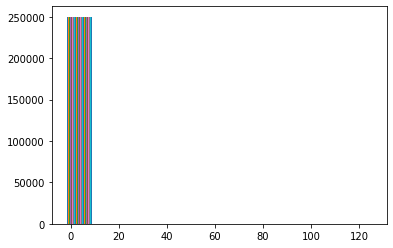

In [21]:
# complete histogram over all features
plt.hist(tx)
plt.show()

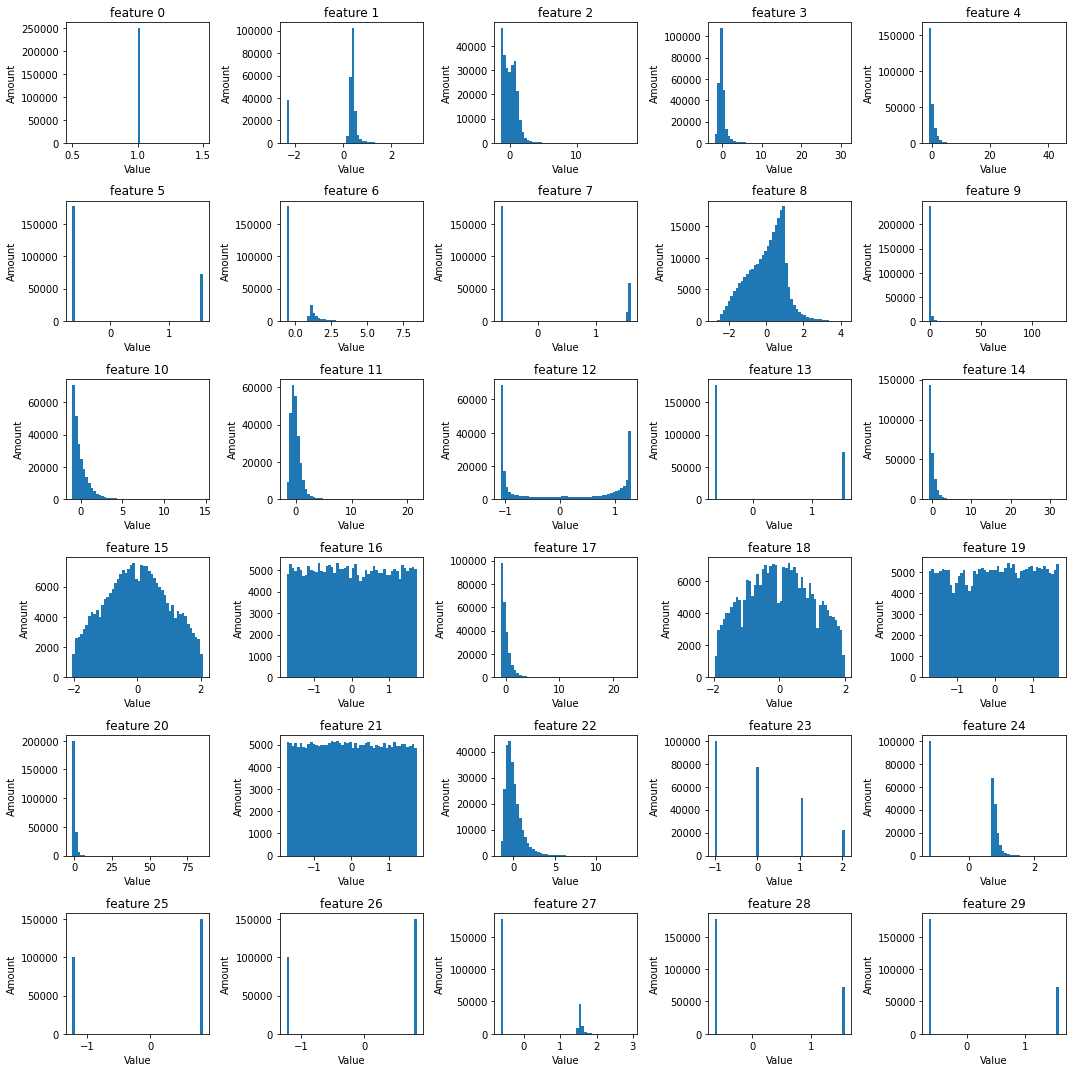

In [22]:
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx[:, i], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

#### Data Cleaning and Preprocessing

In [37]:
val = tx[:, 28].min(axis=0)
index = tx[:, 28].argmin(axis=0)
(val, index)


(-4.100854649844434, 103640)

#### Methods

In [40]:
# Least Squares
least_squares_w, least_squares_loss = least_squares(y, tx)
(least_squares_w, least_squares_loss)

(array([-3.14664000e-01,  9.63458000e-03, -2.54719228e-01, -2.63502968e-01,
        -1.10181144e-03,  2.18423830e-02,  9.00537819e-02,  4.83490564e-03,
         2.82008766e-01, -2.81502578e-02, -3.29272040e+02, -1.88141151e-01,
         1.18065030e-01,  7.66172592e-02,  6.39648815e+01, -7.79460496e-04,
        -8.30656815e-04,  6.30807319e+01, -8.61168752e-04,  2.51791342e-03,
         1.03659311e-01,  9.33786120e-04, -4.70019025e-02,  4.17575954e-02,
        -4.75783460e-02,  6.50726410e-04,  1.88755846e-04, -3.66001845e-02,
         1.55837343e-03, -1.74318677e-03,  2.78938100e+02]),
 0.6808189043231061)

In [41]:
# calculate prediction
ypred = predict_labels(least_squares_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.744592

In [42]:
# Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

gradient_w, gradient_loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

Gradient Descent: execution time=10.500 seconds
Gradient Descend: final loss = 0.691531370619219


In [43]:
# calculate prediction
ypred = predict_labels(gradient_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.736968

In [44]:
# Stochastic Gradient Descent
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

sgd_w, sgd_loss = least_squares_SGD(y, tx, initial_w, max_iters, gamma)

SGD: execution time=0.073 seconds
Gradient Descend: final loss = 1.2123727268576911e-06


In [45]:
# calculate prediction
ypred = predict_labels(sgd_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.610828

## Generate predictions and save ouput in csv format for submission:

In [19]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [24]:
y_pred = predict_labels(least_squares_w, tX_test)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)